In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install awscli

In [ ]:
!pip install tensorflow 

In [ ]:
!pip install aisee

In [ ]:
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/ . --recursive --no-sign-request

In [ ]:
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/ . --recursive --no-sign-request

In [ ]:
import os
os.listdir(os.getcwd())


In [ ]:
airports = []
zoos = []
for folder in os.listdir(os.getcwd()):
    if folder[0:7] == "airport":
      airports.append(folder)
    elif folder[0:3] == "zoo":
      zoos.append(folder)

In [ ]:
cpath = os.getcwd()
os.makedirs(os.path.join(cpath,"Total_airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"Total_zoos"),exist_ok = True)

In [ ]:

os.makedirs(os.path.join(cpath,"drive","MyDrive/","Train","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"drive","MyDrive/""Train","zoos"),exist_ok = True)
os.makedirs(os.path.join(cpath,"drive","MyDrive/""Test","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"drive","MyDrive/""Test","zoos"),exist_ok = True)

In [ ]:
airportspath = []
airphoto = []
zoospath = []
zoosphoto = []
for airfolder in airports:
  tpath = os.path.join(cpath,airfolder)
  for file in os.listdir(tpath):
    if file[len(file) - 4:] == ".jpg":
      airportspath.append(tpath)
      airphoto.append(file)
for zoofolder in zoos:
  tpath = os.path.join(cpath,zoofolder)
  for file in os.listdir(tpath):
    if file[len(file) - 4:] == ".jpg":
      zoospath.append(tpath)
      zoosphoto.append(file)



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
airminwidth = 1000000
airminheight = 1000000
zoominwidth = 1000000
zoominheight = 1000000
for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,airportspath[i],airphoto[i])) 
  dim = temp_pict.shape
  if dim[0] < airminwidth: airminwidth = dim[0]
  if dim[1] < airminheight: airminheight = dim[1]
  
  

for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,zoospath[i],zoosphoto[i]))  
  dim = temp_pict.shape
  if dim[0] < zoominwidth: zoominwidth = dim[0]
  if dim[1] < zoominheight: zoominheight = dim[1]
  

print(airminwidth,airminheight)
print(zoominwidth,zoominheight)

1087 1376
77 94


In [ ]:
import cv2
os.chdir(os.path.join(cpath,"drive","MyDrive","Train","zoos"))
for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,zoospath[i],zoosphoto[i]))  
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(zoosphoto[i],[resized_pict])
  


In [ ]:
os.chdir(os.path.join(cpath,"drive","MyDrive","Test","zoos"))
for i in range(300):
  temp_pict = cv2.imread(os.path.join(cpath,zoospath[1200+i],zoosphoto[1200 + i]))  
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(zoosphoto[1200 + i],[resized_pict])

In [ ]:
os.chdir(os.path.join(cpath,"drive","MyDrive","Train","airports"))
for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,airportspath[i],airphoto[i]))  
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(airphoto[i],[resized_pict])

In [ ]:
os.chdir(os.path.join(cpath,"drive","MyDrive","Test","airports"))
for i in range(300):
  temp_pict = cv2.imread(os.path.join(cpath,airportspath[1200 + i],airphoto[1200 + i]))  
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(airphoto[1200 + i],[resized_pict])

In [ ]:
os.chdir(cpath)
os.getcwd()

'/content'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Train_gen = ImageDataGenerator()
Train_Data = Train_gen.flow_from_directory("drive/MyDrive/Train")
Test_gen = ImageDataGenerator()
Test_Data = Test_gen.flow_from_directory("drive/MyDrive/Test")
SomePhotos = next(Test_Data)

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import applications
inception = applications.InceptionV3(include_top=False, input_shape = (256,256,3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall
predictor = Sequential([
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(2, activation="softmax")
])
modelo = Sequential([inception, predictor])
modelo.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['accuracy', 
                       Precision(),
                       Recall()])

In [ ]:
modelo.fit(Train_Data,epochs=3)


Epoch 1/3
63/63 [==============================] - 908s 14s/step - loss: 0.6481 - accuracy: 0.8755 - precision: 0.8755 - recall: 0.8755
Epoch 2/3
63/63 [==============================] - 897s 14s/step - loss: 0.0804 - accuracy: 0.9840 - precision: 0.9840 - recall: 0.9840
Epoch 3/3
63/63 [==============================] - 883s 14s/step - loss: 0.1014 - accuracy: 0.9670 - precision: 0.9670 - recall: 0.9670


In [ ]:
results = modelo.predict(SomePhotos[0])

1/1 [==============================] - 4s 4s/step


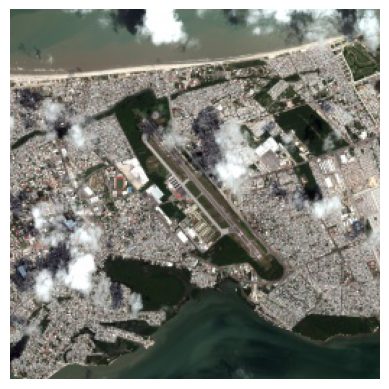

Predicción: aeropuerto


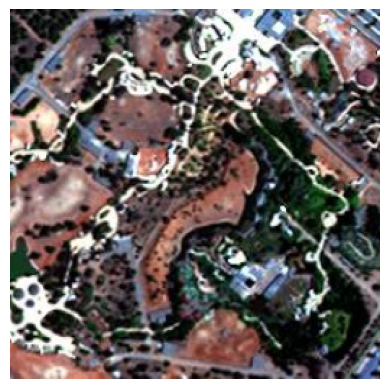

Predicción: zoológico


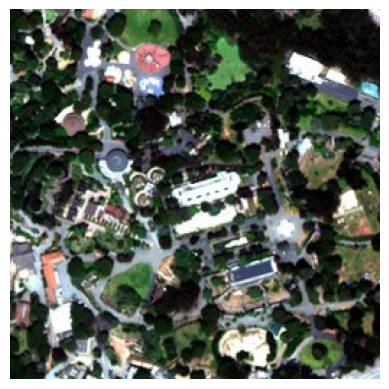

Predicción: zoológico


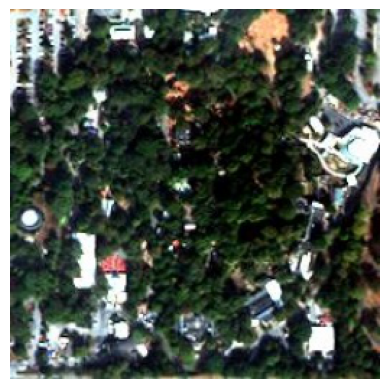

Predicción: zoológico


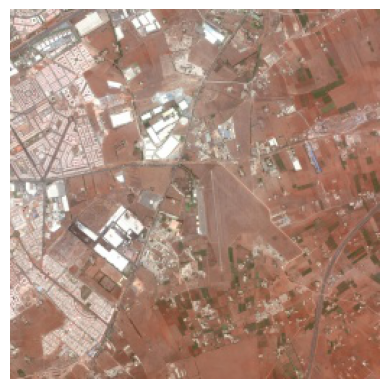

Predicción: aeropuerto


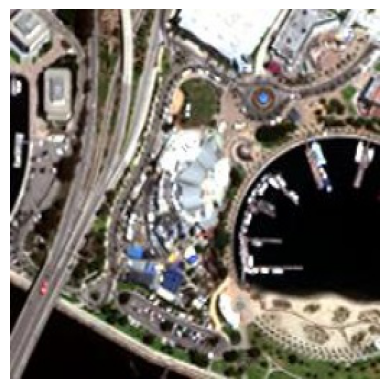

Predicción: zoológico


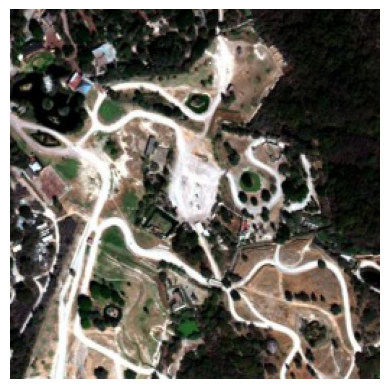

Predicción: zoológico


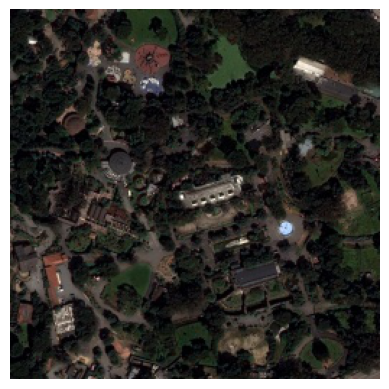

Predicción: zoológico


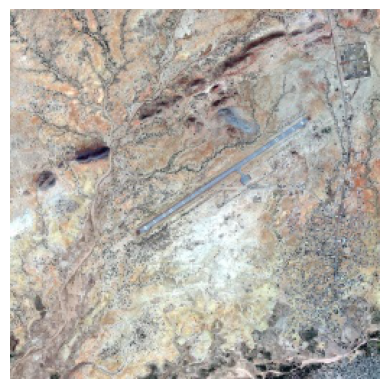

Predicción: aeropuerto


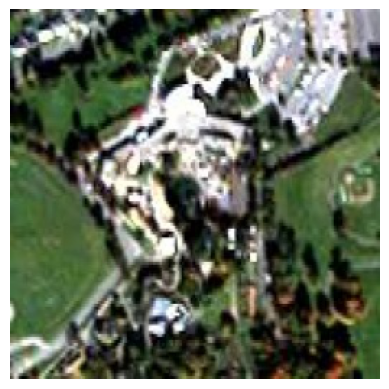

Predicción: zoológico


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
clase = np.argmax(results, -1)
mostrar_imagenes = 10
for i in range(mostrar_imagenes):
    plt.imshow(SomePhotos[0][i]/255.)
    plt.axis('off')
    plt.show()
    print("Predicción:", "zoológico" if clase[i] else "aeropuerto")


In [ ]:
modelo.summary()

In [ ]:
os.chdir(os.path.join(cpath,"drive/MyDrive/ModelsWeights"))
modelo.save("AirZooClassifier.h5")
modelo.save_weights("AirZooWClassifier.h5")

In [ ]:
def Assign(mainpath,photos,subset,cathegory):
  for i in range(len(mainpath)):
    oldpath = os.path.join(mainpath[i],photos[i])
    newpath = os.path.join(os.getcwd(),subset,cathegory,photos[i])
    if(os.path.isfile(oldpath)):
      os.rename(oldpath,newpath)
Assign(airportspath[:int((70 * len(airportspath))/100)],airphoto[:int((70 * len(airphoto))/100)],"Train","airports")
Assign(airportspath[int((70 * len(airportspath))/100):],airphoto[int((70 * len(airphoto))/100):],"Test","airports")
Assign(zoospath[:int((70 * len(zoospath))/100)],zoosphoto[:int((70 * len(zoosphoto))/100)],"Train","zoos")
Assign(zoospath[int((70 * len(zoospath))/100):],zoosphoto[int((70 * len(zoosphoto))/100):],"Test","zoos")

In [ ]:
import cv2
os.makedirs(os.path.join(cpath,"train","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"train","zoos"),exist_ok = True)
os.makedirs(os.path.join(cpath,"test","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"test","zoos"),exist_ok = True)

In [ ]:
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = None


In [ ]:
print(results)

In [ ]:
print(modelo.metrics[1])

MeanMetricWrapper(name=accuracy,dtype=float32,fn=<function binary_accuracy at 0x7f7b304169e0>)


In [ ]:
os.makedirs(os.path.join(cpath,"Total_airports","airports"),exist_ok = True)

In [ ]:
os.chdir(cpath)
Wrong_Data = Test_gen.flow_from_directory("Total_airports")

Found 100 images belonging to 1 classes.


In [ ]:
for i in os.listdir(os.path.join(cpath,"Total_airports","airports")):
   oldpath = os.path.join(cpath,"Total_airports","airports",i)
   newpath = os.path.join(cpath,"TrainZoos","Airports",i)
   os.rename(oldpath,newpath)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.chdir(cpath) 
Train_gen = ImageDataGenerator()
Train_Data = Train_gen.flow_from_directory("Training")

In [ ]:
for i in os.listdir(os.path.join(cpath,"Total_airports","airports")):
   oldpath = os.path.join(cpath,"Total_airports","airports",i)
   newpath = os.path.join(cpath,"TestZoos","Airports",i)
   os.rename(oldpath,newpath)